# Analiza vplivov na dolžino skoka žensk

## Uvod

V tej datoteki bodo predstavljeni podatki pridobljeni skozi projektno nalogo. Osredotočili se bomo na razne korelacije med dolžino skoka in vetrom, starostjo, datumom tekmovanja, državo ter prizoriščem tekmovanja.

Za začetek je potrebno uvoziti določene knjižice:


In [89]:
import pandas as pd
import matplotlib.pyplot as plt


Uvozimo csv v katerem so podatki:

In [4]:
podatki = pd.read_csv('tekmovalke.csv', index_col = "Mesto")
podatki

,Razdalja,Veter,Ime,Rojstvo,Drzava,Prizorisce,Datum,Rezultat,Starost
Mesto,,,,,,,,,
1,7.22,-1.4,Malaika MIHAMBO,03 FEB 1994,GER,"Stadio Olimpico, Roma (ITA)",12 JUN 2024,1275,30.0
2,7.18,0.0,Tara DAVIS-WOODHALL,20 MAY 1999,USA,"Convention Center, Albuquerque, NM (USA) (i)",16 FEB 2024,1258,24.0
3,6.98,1.1,Jasmine MOORE,01 MAY 2001,USA,"Hayward Field, Eugene, OR (USA)",29 JUN 2024,1213,23.0
4,6.97,0.6,Plamena MITKOVA,18 SEP 2004,BUL,"Stadium Ivaylo, Veliko Tarnovo (BUL)",30 JUN 2024,1211,19.0
5,6.94,0.1,Larissa IAPICHINO,18 JUL 2002,ITA,"Stadio Olimpico, Roma (ITA)",12 JUN 2024,1205,21.0
...,...,...,...,...,...,...,...,...,...
695,6.06,0.0,Marijke ESSELINK,22 JUN 1999,NED,"Stadium Jean-Pellez, Aubi&#233;re (FRA) (i)",28 JAN 2024,1012,24.0
695,6.06,0.0,Winny Chepngetich BII,27 DEC 2003,KEN,"Ahearn Field House, Manhattan, KS (USA) (i)",02 FEB 2024,1012,20.0
695,6.06,0.0,Sofia PRIBIL,09 FEB 2006,RUS,"Virazhi Arena, Togliatti (RUS) (i)",17 FEB 2024,1012,18.0


## Zastopanost držav
Najprej si poglejmo, v kakšnem deležu so na prvih 695 mestih zastopane posamezne države.
Domnevam, da bodo med najmočnejšimi (glede na pretekle rezultate) ZDA, Nemčija ter Jamajka.

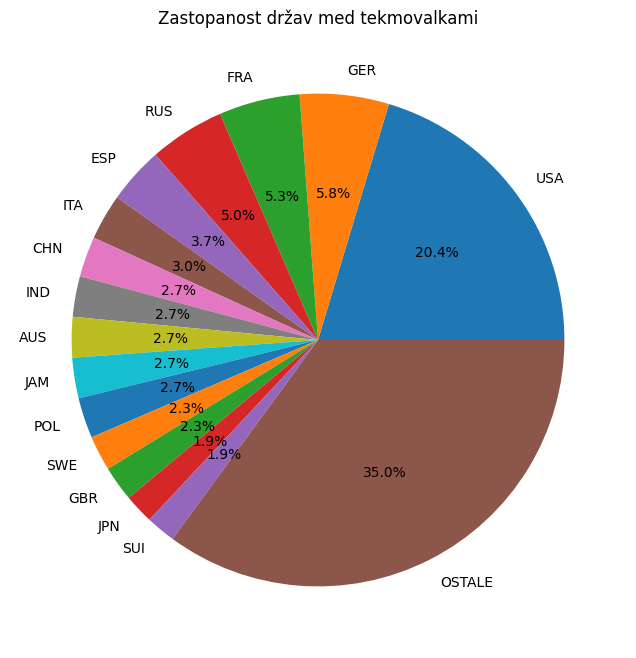

In [8]:
zastopanost = podatki['Drzava'].value_counts()
prvih_15 = zastopanost.head(15)
ostale = zastopanost[15:].sum()

podatki_za_graf = prvih_15.copy()
podatki_za_graf['OSTALE'] = ostale

plt.figure(figsize=(10, 8))
plt.pie(podatki_za_graf, labels=podatki_za_graf.index, autopct='%1.1f%%')
plt.title('Zastopanost držav med tekmovalkami')
plt.show()

Moja hipoteza, da bodo ZDA, Nemčija ter Jamajka med najmočnejšimi je delno pravilna, ZDA in Nemčija sta na prvem ter drugem mestu, Jamajka pa se po zastopanosti pojavi na 10. mestu.

## Uspešnost držav
Naslednja stvar, ki sem se jo odločila pogledati, je katere države so dejansko najuspešnejše po dolžini skoka. Glede na prejšnji graf domnevam, da bo med njimi vsekakor ZDA, hkrati pa puščam odprto možnost, da bo visoko tudi kakšna država, ki ni med najbolj zastopanimi.

In [9]:
povprecja_drzave = podatki.groupby('Drzava')['Razdalja'].mean().sort_values(ascending=False)

print("Top 10 držav po povprečni dolžini skoka:")
print(povprecja_drzave.head(10))

Top 10 držav po povprečni dolžini skoka:
Drzava
COL    6.740000
EGY    6.680000
CYP    6.640000
BUR    6.615000
NGR    6.606667
PAN    6.580000
GRN    6.560000
BLR    6.555000
IVB    6.530000
TTO    6.530000
Name: Razdalja, dtype: float64


Dobili smo presenetljiv rezultat. Kot lahko vidimo zgoraj, se med prvimi desetimi najuspešnejšimi državami na podlagi povprečne dolžine skoka pojavijo tiste, ki so manj zastopane (Kolumbija, Egipt, Ciper itd.). Poglejmo si še graf, kjer je razvidna primerjava, med zastopanostjo države, ter povprečnim rezultatom:

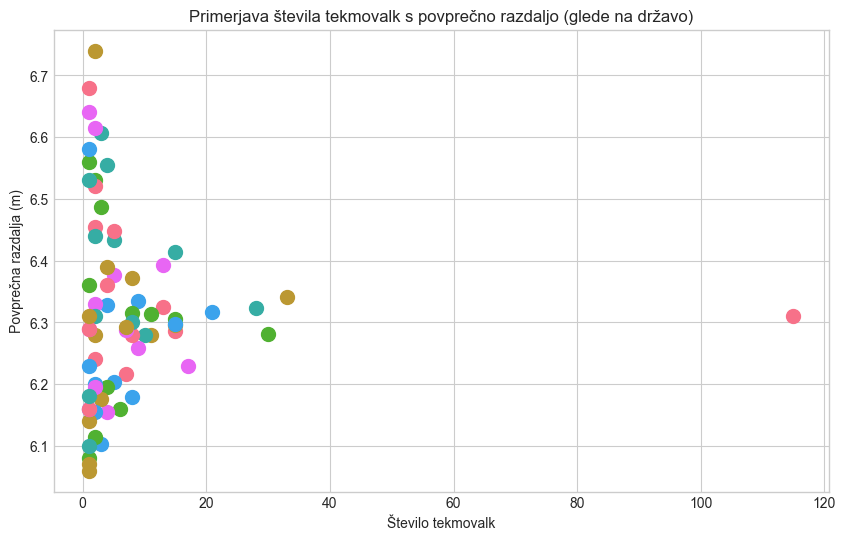

In [77]:
plt.figure(figsize=(10,6))

vse_drzave = zastopanost.index

povprecne_razdalje = podatki.groupby('Drzava')['Razdalja'].mean()

for drzava in vse_drzave:
    st_tekmovalk = zastopanost[drzava]
    povprecna_razdalja = povprecne_razdalje[drzava]
    plt.scatter(st_tekmovalk, povprecna_razdalja, s=100)

plt.xlabel('Število tekmovalk')
plt.ylabel('Povprečna razdalja (m)')
plt.title('Primerjava števila tekmovalk s povprečno razdaljo (glede na državo)')
plt.grid(True)

Iz grafa ne moremo narediti gotovega zaključka, kako število tekmovalk vpliva na povprečno razdaljo skoka, vendar vsekakor nismo potrdili tega, da večje število tekmovalk iz določene države pomeni boljši povprečni rezultat.

## Vpliv starosti
Ker mi je vir podatkov ponujal podatke o datumu tekmovanju ter datumu rojstva tekmovalk, sem se odločila pogledati ali obstaja optimalna starost za najboljše rezultate. Za začetek si poglejmo porazdelitev starosti med tekmovalkami.

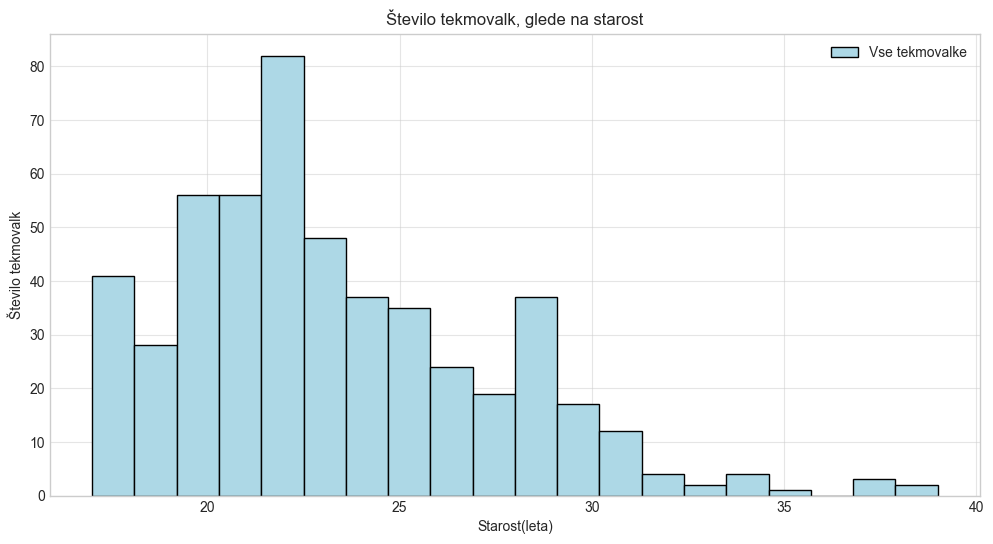

In [78]:
plt.figure(figsize=(12, 6))
plt.hist(podatki['Starost'], bins=20, color='lightblue', edgecolor='black', label='Vse tekmovalke')

plt.xlabel('Starost(leta)')
plt.ylabel('Število tekmovalk')
plt.title('Število tekmovalk, glede na starost')
plt.legend()
plt.grid(True, alpha=0.5)


Največ tekmovalk je starih med 20 in 25, po 30. letu pa jih ostane bolj malo. Graf pa nam ne pove ničesar o primerjavi starosti z uspešnostjo, zato nadaljujemo z analizo.

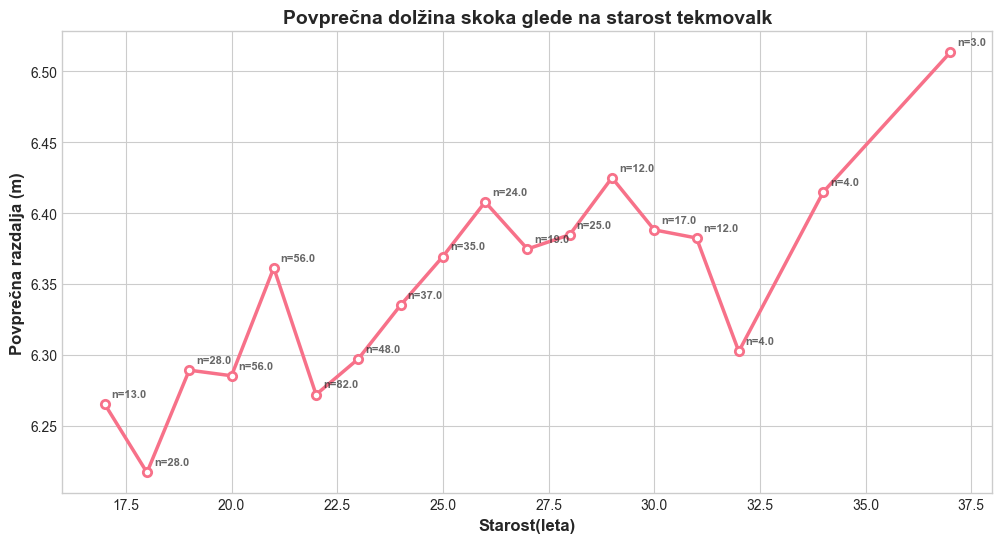

In [84]:
povprecja_po_starosti = podatki.groupby('Starost')['Razdalja'].agg(['mean', 'count']).reset_index()

povprecja_po_starosti = povprecja_po_starosti[povprecja_po_starosti['count'] >= 3]


plt.figure(figsize=(12,6))

plt.plot(povprecja_po_starosti['Starost'], povprecja_po_starosti['mean'],
         'o-', linewidth=2.5, markersize=6,
         markerfacecolor='white', markeredgewidth=2)

plt.xlabel('Starost(leta)', fontsize=12, fontweight='bold')
plt.ylabel('Povprečna razdalja (m)', fontsize=12, fontweight='bold')
plt.title('Povprečna dolžina skoka glede na starost tekmovalk', fontsize=14, fontweight='bold')

for i, row in povprecja_po_starosti.iterrows():
    plt.annotate(f"n={row['count']}", 
                 (row['Starost'], row['mean']),
                 xytext=(5, 5),  textcoords='offset points',
                 fontsize=8, alpha=0.7, fontweight='bold')



Zaradi boljše preglednosti sem se odločila vzeti povprečno dolžino skoka za posamezo starost in to dolžino primerjala s starostjo. Ker smo že pri prejšnjem grafu ugotovili, da se število tekmovalk glede na starost razlikuje, sem zraven dopisala tudi koliko tekmovalk posamezne starosti je. Iz grafa vidimo da je pravzaprav zmagovalna starost 37 let. Vendar pa moramo ta rezultat interpretirati zelo previdno ravno zaradi števila tekmovalk te starosti, samo 4.

## Vpliv vetra
Oglejmo si sedaj kakšen vpliv ima veter na rezultat.

In [86]:
# Preverimo različne vrednosti vetra
print("Različne vrednosti vetra v podatkih:")
print(podatki['Veter'].value_counts().head(10))


def kategoriziraj_veter_detajlno(veter_value):
    try:
        veter_stevilo = float(veter_value)
        if veter_stevilo == 0:
            return 'Brez vetra'
        elif veter_stevilo > 0:
            return f'V hrbet (+{veter_stevilo})'
        else:
            return f'V obraz ({veter_stevilo})'
    except:
        return 'Brez vetra'

# Ustvarimo podrobne kategorije
podatki['Veter_kategorija_detajlno'] = podatki['Veter'].apply(kategoriziraj_veter_detajlno)

# Porazdelitev po kategorijah
porazdelitev = podatki['Veter_kategorija_detajlno'].value_counts()
delezi = podatki['Veter_kategorija_detajlno'].value_counts(normalize=True) * 100

print(f"Porazdelitev vetrov:")
for kategorija, st_tekmovalk in porazdelitev.items():
    delež = delezi[kategorija]
    print(f"   {kategorija}: {st_tekmovalk} tekmovalk ({delež:.1f}%)")

Različne vrednosti vetra v podatkih:
Veter
0.0    180
1.6     21
1.1     21
1.0     21
0.1     19
1.3     19
0.7     18
0.8     18
1.7     18
0.9     18
Name: count, dtype: int64
Porazdelitev vetrov:
   Brez vetra: 180 tekmovalk (31.9%)
   V hrbet (+1.6): 21 tekmovalk (3.7%)
   V hrbet (+1.1): 21 tekmovalk (3.7%)
   V hrbet (+1.0): 21 tekmovalk (3.7%)
   V hrbet (+0.1): 19 tekmovalk (3.4%)
   V hrbet (+1.3): 19 tekmovalk (3.4%)
   V hrbet (+0.7): 18 tekmovalk (3.2%)
   V hrbet (+0.8): 18 tekmovalk (3.2%)
   V hrbet (+1.7): 18 tekmovalk (3.2%)
   V hrbet (+0.9): 18 tekmovalk (3.2%)
   V hrbet (+1.9): 16 tekmovalk (2.8%)
   V hrbet (+0.5): 16 tekmovalk (2.8%)
   V hrbet (+0.3): 16 tekmovalk (2.8%)
   V obraz (-0.1): 16 tekmovalk (2.8%)
   V hrbet (+1.8): 15 tekmovalk (2.7%)
   V hrbet (+0.6): 15 tekmovalk (2.7%)
   V hrbet (+1.2): 14 tekmovalk (2.5%)
   V hrbet (+2.0): 13 tekmovalk (2.3%)
   V hrbet (+1.4): 11 tekmovalk (1.9%)
   V hrbet (+0.2): 11 tekmovalk (1.9%)
   V hrbet (+1.5): 10 

Zgoraj lahko vidimo nekaj najpogostejših vrednosti vetra, pri katerih so nastopile tekmovalke.
Spodaj pa je s tortnim grafom predstavljeno koliko tekmovalk je skočilo brez vetra, koliko je moralo skočiti v nasprotno smer vetra in koliko jih je skočilo v isto smer kot je pihal veter.


Text(0.5, 1.0, 'Porazdelitev vetrov v treh kategorijah')

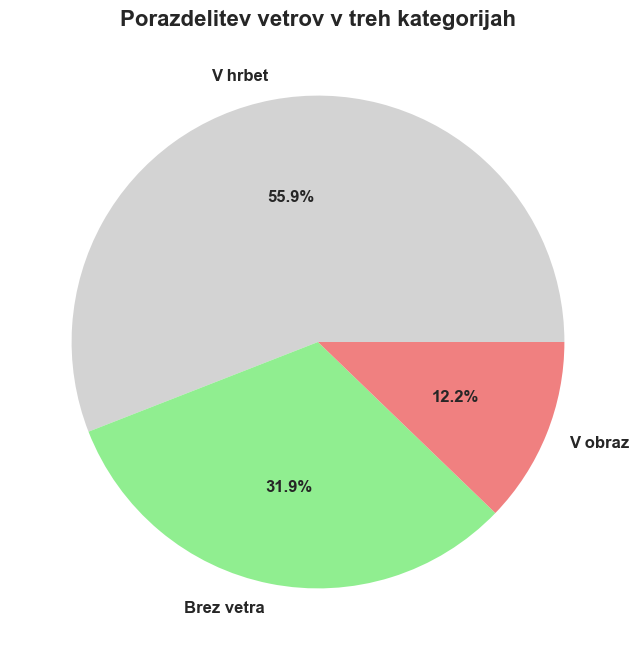

In [56]:
def veter_enostavno(kategorija):
    if 'Brez vetra' in kategorija:
        return 'Brez vetra'
    elif 'V hrbet' in kategorija:
        return 'V hrbet'
    elif 'V obraz' in kategorija:
        return 'V obraz'
    else:
        return 'Brez vetra'

podatki['Veter_tri_kategorije'] = podatki['Veter_kategorija_detajlno'].apply(veter_enostavno)

tri_kategorije = podatki['Veter_tri_kategorije'].value_counts()
delezi_tri = (tri_kategorije / len(podatki)) * 100

plt.figure(figsize=(10,8))
barve = ['lightgray', 'lightgreen', 'lightcoral']

plt.pie(tri_kategorije.values,
        labels=tri_kategorije.index,
        autopct='%1.1f%%',
        colors=barve,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Porazdelitev vetrov v treh kategorijah',
          fontsize=16, fontweight='bold')

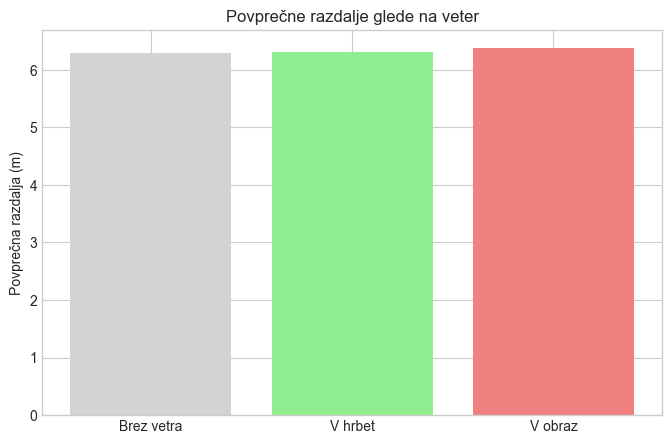

Povprečne razdalje:
Brez vetra: 6.30m
V hrbet: 6.31m
V obraz: 6.37m


In [63]:
# Povprečne razdalje po vrstah vetra
povprecja = podatki.groupby('Veter_tri_kategorije')['Razdalja'].mean()

plt.figure(figsize=(8, 5))
plt.bar(povprecja.index, povprecja.values, color=['lightgray', 'lightgreen', 'lightcoral'])
plt.ylabel('Povprečna razdalja (m)')
plt.title('Povprečne razdalje glede na veter')
plt.show()

print("Povprečne razdalje:")
for kategorija, razdalja in povprecja.items():
    print(f"{kategorija}: {razdalja:.2f}m")

Kot lahko vidimo na zgornjem grafu, veter v resnici nima ogromnega vpliva na dolžino skoka, prav tako pa se v resnici pri skupnem seštevku za mesto upošteva, da ne bi prišlo do prevelikih odstopanj.

## Vpliv časa v letu
Oglejmo si sedaj, kako vpliva datum tekmovanja na rezultate. Odločila sem se osredotočiti na mesece.

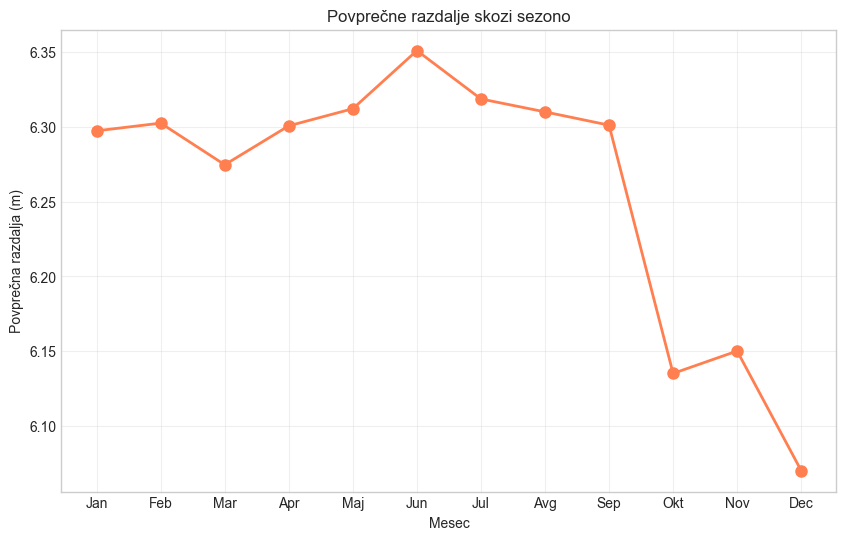

In [73]:

# Pretvorimo datum v mesec
podatki['Datum_dt'] = pd.to_datetime(podatki['Datum'], format='%d %b %Y')
podatki['Mesec'] = podatki['Datum_dt'].dt.month

# Povprečne razdalje po mesecih
povprecja_meseci = podatki.groupby('Mesec')['Razdalja'].mean()

imena_mesecev = ['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 
                 'Jul', 'Avg', 'Sep', 'Okt', 'Nov', 'Dec']


plt.figure(figsize=(10, 6))
plt.plot(imena_mesecev, povprecja_meseci, 'o-', linewidth=2, markersize=8, color='coral')
plt.xlabel('Mesec')
plt.ylabel('Povprečna razdalja (m)')
plt.title('Povprečne razdalje skozi sezono')
plt.grid(True, alpha=0.3)


Kot lahko vidimo so rezultati boljši na začetku in na sredini leta, najboljši v juniju, najslabši pa v decembru.

## Vpliv lokacije
Za konec si poglejmo še, kakšen vpliv ima na rezultat lokacija tekmovanja. Poglejmo si 10 najbolj popularnih lokacij:

In [74]:
# Število različnih tekmovanj(datumov) na posameznem prizorišču
tekme_na_prizoriscu = podatki.groupby('Prizorisce')['Datum'].nunique().sort_values(ascending=False).head(10)

print("10 prizorišč z največ tekmovanji:")
for lokacija, st_tekem in tekme_na_prizoriscu.items():
    print(f"• {lokacija}: {st_tekem} tekmovanj")

10 prizorišč z največ tekmovanji:
• Hayward Field, Eugene, OR (USA): 6 tekmovanj
• SA Athletic Stadium, Adelaide (AUS): 4 tekmovanj
• Convention Center, Albuquerque, NM (USA) (i): 4 tekmovanj
• Centro de Tecnificaci&#243;n de Atletismo, Antequera (ESP) (i): 4 tekmovanj
• Percy Beard Track, Gainesville, FL (USA): 4 tekmovanj
• Univ. of Arizona Roy P. Drachman Stadium, Tucson, AZ (USA): 3 tekmovanj
• Boudewijnstadion, Bruxelles (BEL): 3 tekmovanj
• Pilditch Stadium, Pretoria (RSA): 3 tekmovanj
• Lasnam&#228;e Kergej&#245;ustikuhall, Tallinn (EST) (i): 3 tekmovanj
• Stadio Olimpico, Roma (ITA): 3 tekmovanj


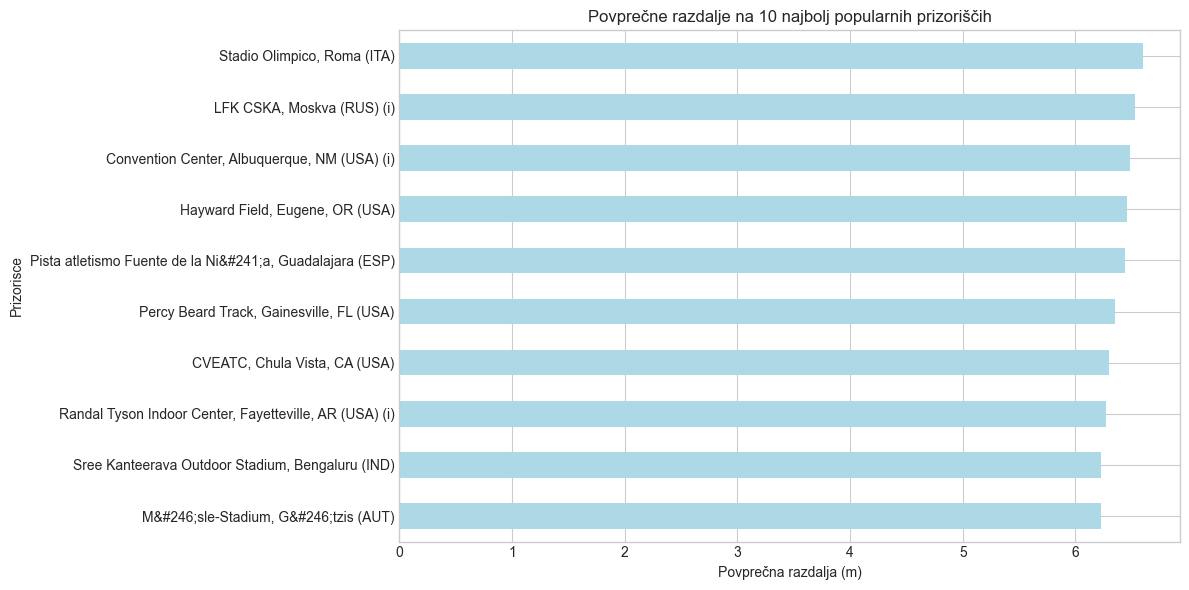

In [88]:
# Povprečne razdalje na 10 najbolj popularnih prizoriščih
popularne_lokacije = podatki['Prizorisce'].value_counts().head(10).index
povprecja = podatki[podatki['Prizorisce'].isin(popularne_lokacije)].groupby('Prizorisce')['Razdalja'].mean()

plt.figure(figsize=(12, 6))
povprecja.sort_values().plot(kind='barh', color='lightblue')
plt.xlabel('Povprečna razdalja (m)')
plt.title('Povprečne razdalje na 10 najbolj popularnih prizoriščih')
plt.tight_layout()


Izkaže se torej, da so v povprečju najboljši rezultati doseženi v Italiji, na Olimpijskem stadionu v Rimu.

## Zaključek

Skozi analizo, smo ugotovili, da ni posameznega faktorja, ki najbolj vpliva na dolžino skoka, jih je pa več, ki pripomorejo h slabšemu ali boljšemu rezultatu. Seveda, bi se dalo s temi podatki analizirati še marsikaj, prav tako pa bi z dodatnimi podatki lahko našli še kakšen vzrok za raznolikost rezultatov.